# *Capstone Webscrapping using BeautifulSoup by Samuel Libertus*

*This notebook contains guidances & tasks on the data processing for the application*

## *Task*

2. (Medium) Data kurs US Dollar ke rupiah dari `https://www.exchange-rates.org/history/IDR/USD/T`

    * Dari halaman tersebut carilah `harga harian` dan `tanggal`
    * Bualah plot pergerakan kurs USD 
    
## *Background*

- Melakukan *scrapping data* `harga harian` dan `tanggal` yang ada di Data harga harian kurs US Dollar ke rupiah dari `https://www.exchange-rates.org/history/IDR/USD/T`
- Melakukan *data wrangling* dan *vizualization* menggunakan plot pada data pergerakan kurs USD yang telah berhasil di-*scrapping* 

## *Requesting the Data and Creating a BeautifulSoup*

*Let's begin with requesting the web from the site with `get` method.*

In [47]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [48]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [49]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## *Finding the right key to scrap the data & Extracting the right information*

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.

### 1. Menggunakan *inspect* pada *website* yang dituju, temukan *code* dan letak tabel yang ingin di-*scrapping* pada html *website*

In [50]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})

# Menampilkan 500 line pertama
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/8/2022
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-8-2022">
     14,976.95000
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-8-2022">
     USD IDR rate for 7/8/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/7/2022
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7


### 2. Mencari data yang diinginkan pada tabel

In [51]:
for i in range(0, 5):    
    #scrapping process
    td = table.find_all('td')[i].text
    print(td)

7/8/2022
Friday
14,976.95000 IDR
USD IDR rate for 7/8/2022
7/7/2022


a. Terlihat bahwa data tanggal yang diinginkan terdapat pada setiap pengulangan ke-4 data 'td'

In [52]:
for i in range(0, 5):

    #scrapping process
    a = table.find_all('a')[i].text
    print(a)

14,976.95000
USD IDR rate for 7/8/2022
14,964.65000
USD IDR rate for 7/7/2022
14,996.82520


b. Terlihat bahwa data harga harian  yang diinginkan terdapat pada setiap pengulangan ke-2 data 'a'

In [53]:
td = table.find_all('td')
row_length = len(td)
print("row_length_td: ", row_length)

a = table.find_all('a')
row_length = len(a)
print("row_length_a : ", row_length)

row_length_td:  520
row_length_a :  260


c. Selain itu, terlihat juga bahwa banyak data 'a', persis 2 kali lipat dari banyak data 'td' ('td' = 2*'a').

### 3. *Scrapping* semua data yang diinginkan menggunakan *looping* dan menyimpannya pada sebuah *list* kosong

Oleh karena itu, dari poin 2c, untuk *looping scrapping* data yang diinginkan, dapat menggunakan row_length dari data 'a' sebagai i sehingga *indexing* untuk data 'a' tetap menggunakan i sedangkan untuk data 'td' menjadi 2*i.

Selain itu, dari poin 2a dan 2b, "looping" yang akan digunakan juga akan menggunakan step = 2.

In [54]:
harga = table.find_all('a')
row_length = len(harga)
row_length

# Membuat list kosong
temp = []

for i in range(0, row_length, 2):

    #scrapping process untuk harga harian
    harga = table.find_all('a')[i].text
    harga = harga.strip()

    #scrapping process untuk tanggal
    tanggal = table.find_all('td')[2*i].text
    tanggal = tanggal.strip()
    
    # Menambahkan data yang telah di-scrapping ke list
    temp.append((tanggal, harga))

# Membalikan urutan data yang ada
temp = temp[::-1] 

# Menampilkan 5 data pertama
temp[:5]

[('1/10/2022', '14,290.15000'),
 ('1/11/2022', '14,284.46501'),
 ('1/12/2022', '14,298.95000'),
 ('1/13/2022', '14,309.00000'),
 ('1/14/2022', '14,314.55000')]

## *Creating data frame & Data wrangling*

### 4. *Put the array into dataframe*

In [55]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('tanggal','harga_harian'))
df.head()

,tanggal,harga_harian
0,1/10/2022,"14,290.15000"
1,1/11/2022,"14,284.46501"
2,1/12/2022,"14,298.95000"
3,1/13/2022,"14,309.00000"
4,1/14/2022,"14,314.55000"


Mengecek tipe data

In [56]:
df.dtypes

tanggal         object
harga_harian    object
dtype: object

Mengubah tipe data menjadi lebih sesuai:
- tanggal = datetime65
- harga_harian = float

In [57]:
df['tanggal'] = df['tanggal'].astype('datetime64')
df['harga_harian'] = df['harga_harian'].str.replace(",","")
df['harga_harian'] = df['harga_harian'].astype('float64')
df.dtypes

tanggal         datetime64[ns]
harga_harian           float64
dtype: object

In [58]:
# Menampilkan 5 data pertama
df.head()

,tanggal,harga_harian
0,2022-01-10,14290.15000
1,2022-01-11,14284.46501
2,2022-01-12,14298.95000
3,2022-01-13,14309.00000
4,2022-01-14,14314.55000


In [59]:
# Menjadikan tanggal sebagi index data
df = df.set_index('tanggal')

### 5. *Data visualisation*

<AxesSubplot:xlabel='tanggal'>

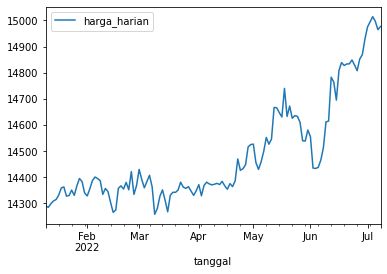

In [60]:
# Membuat plot yang sesuai untuk data yaitu plot garis sehingga dapat langsung hanya menggunalan df.plot()
df.plot()

Dari plot di atas, dapat terlihat bahwa perubahan harga kurs harian US Dollar ke rupiah pada tahun 2022 ini cukup stabil di antara 14300 hingga 14400 rupiah dari awal tahun hingga pertengahan April. Namun, harganya mulai naik sejak pertengahan April walaupun sempat jatuh kembali sejak pertengahan Mei ke awal Juni. Dari awal Juni tersebut, harganya masih terus naik secara drastis hingga awal bulan Juli ini dan memuncak di awal Juli ini dengan sudah menyentuh angka 15000 rupiah.

### 6. Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`